### 다양한 통계치 구하기

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

데이터 프레임을 읽어 옵니다:

In [2]:
df = pd.read_csv('data_studentlist_en.csv', header='infer',encoding = 'latin1')

In [3]:
df.shape

(17, 8)

데이터 프레임의 상단과 하단:

In [4]:
df.head()

,name,gender,age,grade,absence,bloodtype,height,weight
0,Jared Diamond,M,23,3,Y,O,165.3,68.2
1,Sarah O'Donnel,F,22,2,N,AB,170.1,53.0
2,Brian Martin,M,24,4,N,B,175.0,80.1
3,David Hassel,M,23,3,N,AB,182.1,85.7
4,Clara Rodriquez,F,20,1,Y,A,168.0,49.5


In [5]:
df.loc[:,'height'].mean()

170.03529411764703

In [6]:
df['height'].mean()

170.03529411764703

In [7]:
df['height'].median()

169.2

In [8]:
df['height'].min()

155.2

In [9]:
df['height'].max()

182.1

In [10]:
df['height'].quantile(0.1)

160.48

In [11]:
df['height'].quantile(0.9)

179.1

In [12]:
IQR = df['height'].quantile(0.75)- df['height'].quantile(0.25)
IQR

10.799999999999983

In [13]:
Q1 = df.height.quantile(0.25)
Q3 = df.height.quantile(0.75)
IQR = Q3 - Q1
IQR

10.799999999999983

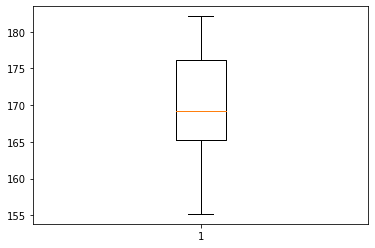

In [14]:
plt.boxplot(df['height'])
plt.show()

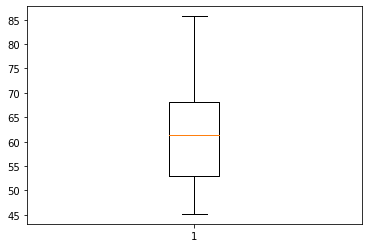

In [15]:
plt.boxplot(df['weight'])
plt.show()

In [16]:
df['height'].var(ddof=1) # ddaf : 불편 추정량, 1이 기본값
# df.height.var()

61.61867647058828

In [17]:
# 분산 : ((제곱의 기댓값 - 기댓값의 제곱) * n) / (n - 1)
(((df['height'])**2).mean() - (df['height'].mean())**2)*17/16

61.618676470603305

In [18]:
df['height'].std(ddof=1) # 표준 편차

7.849756459316956

In [19]:
df['height'].cov(df['weight']) # 공분산

61.790698529411785

In [20]:
df['height'].corr(df['weight']) # 상관계수

0.6641815979588611

In [21]:
df['height'].cov(df['weight'])/(df['height'].std(ddof=1)*df['weight'].std(ddof=1)) # 상관계수 (위와 동일)

0.6641815979588611

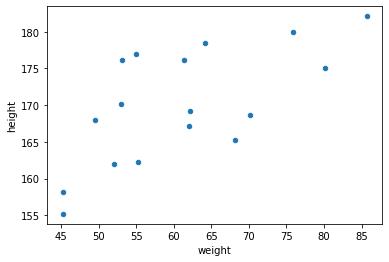

In [22]:
# 전체 같은 색으로.
df.plot.scatter(x='weight',y='height')
plt.show()

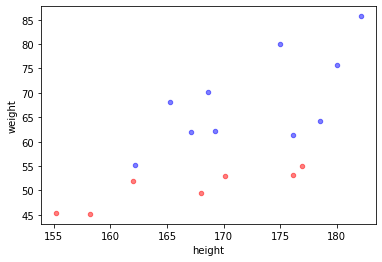

In [23]:
# 성별로 색상 구분. 방법 #1.
base=df[df.gender=='M'].plot.scatter(x='height', y='weight',color='blue', alpha=0.5, marker='o',s=20)
df[df.gender=='F'].plot.scatter(x='height', y='weight',color='red', alpha = 0.5, marker='o',s=20, ax=base)
plt.show()

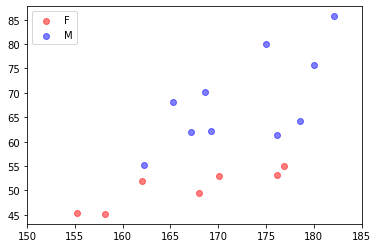

In [24]:
# 성별로 색상 구분. 방법 #2.
my_groups = df.groupby('gender')
my_colors = ['red', 'blue', 'orange', 'green']
i=0
for name, dfb in my_groups:
    plt.scatter(dfb.height, dfb.weight, color = my_colors[i], alpha = 0.5, label=name)
    i +=1
plt.legend(loc=2)
plt.xlim([150,185])
plt.show()

In [25]:
df.height.skew() # 왜도

-0.2668305964926723

In [26]:
df.weight.skew()

0.6195151099956852

In [27]:
df.height.kurt() # 첨도

-0.819375108695509